In [4]:
from PIL import Image
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from generators.genutils import *
from generators.randomwalk_animation import randomwalk

import os

# More Random Walks

Just because I like them. For these, I'm going to just walk the source image for colors.

Source images:

* *Hawaiian Landscape*, Arman Manookian (1928). Source: [WikiArt](https://www.wikiart.org/en/arman-manookian/hawaiian-landscape-1928)
* *Morning*, Mikalojus Konstantinas Ciurlionis (1904). Source: [WikiArt](https://www.wikiart.org/en/mikalojus-ciurlionis/morning-1904)
* Cover for the book *The Crane and Heron. Bear*, Heorhiy Narbut (1907). Source: [WikiArt](https://www.wikiart.org/en/heorhiy-narbut/cover-for-the-book-the-crane-and-heron-bear-1907)

In [7]:
gifdir = "animated_gifs"
sourcedir = "sourceimages"

hawaiian_landscape = os.path.join(sourcedir, "hawaiian-landscape-1928_280x208.jpg")
morning = os.path.join(sourcedir, "morning-1904_280x349.jpg")
craneheron = os.path.join(sourcedir,"cover-for-the-book-the-crane-and-heron-bear-1907_210x284.jpg" )

side = 128
scale = 2
rng = np.random.default_rng(202405)

## Hawaiian Landscape

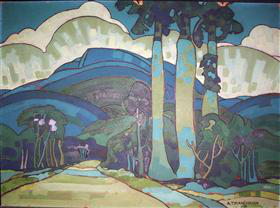

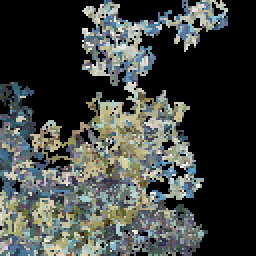

In [9]:
oimage = Image.open(hawaiian_landscape)
display(oimage)

colors = list(oimage.getdata())
colorlist = [ColorClass(c) for c in colors]
walk2 = randomwalk(colorlist, 
                   os.path.join(gifdir, "hawaiian_landscape.gif"), 
                   shuffle_colors=False,
                   size=side, scale=2, rng=rng)
display(walk2)

## Morning

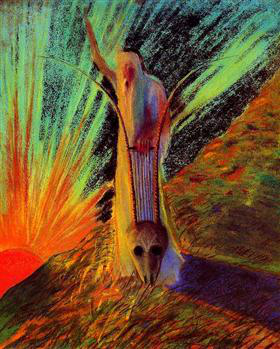

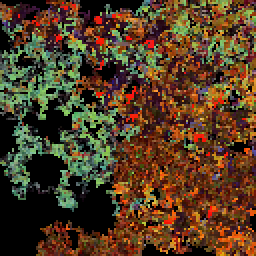

In [10]:
oimage = Image.open(morning)
display(oimage)

colors = list(oimage.getdata())
colorlist = [ColorClass(c) for c in colors]
walk2 = randomwalk(colorlist, 
                   os.path.join(gifdir, "morning.gif"), 
                   shuffle_colors=False,
                   size=side, scale=2, rng=rng)
display(walk2)

## The Crane and Heron

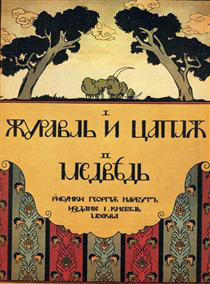

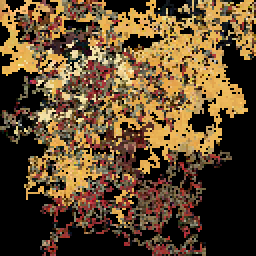

In [11]:
oimage = Image.open(craneheron)
display(oimage)

colors = list(oimage.getdata())
colorlist = [ColorClass(c) for c in colors]
walk2 = randomwalk(colorlist, 
                   os.path.join(gifdir, "craneheron.gif"), 
                   shuffle_colors=False,
                   size=side, scale=2, rng=rng)
display(walk2)

In [13]:
# try converting morning.gif to video, since it's the largest
import cv2 # opencv-python

# Open the animated GIF
gif = Image.open('animated_gifs/morning.gif')

# Convert the GIF frames to a list of NumPy arrays
frames = []
while True:
    try:
        gif.seek(gif.tell() + 1)
        frame = np.array(gif)
        frames.append(frame)
    except EOFError:
        break

# append the last frame a couple more times, so it's sticky
frames.append(frames[-1])
frames.append(frames[-1])

# Define the output video file
output_video = cv2.VideoWriter('animated_gifs/morning.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, frames[0].shape[:2])

# Write each frame to the video. cv2 writes the colors backwards!!!!!
for frame in frames:
    output_video.write(cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR))

# Release the video writer
output_video.release()

vimeo link for viridis movie (different run) - https://vimeo.com/950623487/35a22641ac?share=copy